In [4]:
!pip install tushare
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import pywt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=2c88af9563660dad7437811e7bb987d4fb92ccdd54cbfc4ae1bb4d3365b1d19d
  Stored in directory: c:\users\56492\appdata\local\pip\cache\wheels\3b\fb\fd\c34d8e6cb51eabd4657dff7afb6e4b32196972175a33500555
Successfully built bs4


In [57]:
df = pd.read_csv('./g-research-crypto-forecasting/train.csv',encoding = 'utf-8',index_col = 0)

D:\Anaconda\anaconda\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:

#(ca,cd) = pywt.dwt(close,'db3') #离散小波变换
#cat = pywt.threshold(ca,np.std(ca),mode = 'soft')
#cdt = pywt.threshold(cd,np.std(cd),mode = 'soft')
#close1 = pywt.idwt(cat,cdt,'db3') 

In [7]:
asset_0 = df[df['Asset_ID'] == 0]
close_0 = asset_0['Close']

In [36]:
#模块调用
import numpy as np
import math
import pywt


#封装成函数
def sgn(num):
    if (num > 0):
        return 1.0
    elif (num == 0):
        return 0.0
    else:
        return -1.0


def wavelet_noising(new_df):
    data = new_df
    data = data.values.T.tolist()  # 将np.ndarray()转为列表
    w = pywt.Wavelet('sym8')
    # [ca3, cd3, cd2, cd1] = pywt.wavedec(data, w, level=3)  # 分解波
    [ca5, cd5, cd4, cd3, cd2, cd1] = pywt.wavedec(data, w, level=5)  # 分解波

    length1 = len(cd1)
    length0 = len(data)

    Cd1 = np.array(cd1)
    abs_cd1 = np.abs(Cd1)
    median_cd1 = np.median(abs_cd1)

    sigma = (1.0 / 0.6745) * median_cd1
    lamda = sigma * math.sqrt(2.0 * math.log(float(length0), math.e))
    usecoeffs = []
    usecoeffs.append(ca5)  # 向列表末尾添加对象
    #软硬阈值折中的方法
    a = 0.5

    for k in range(length1):
        if (abs(cd1[k]) >= lamda):
            cd1[k] = sgn(cd1[k]) * (abs(cd1[k]) - a * lamda)
        else:
            cd1[k] = 0.0

    length2 = len(cd2)
    for k in range(length2):
        if (abs(cd2[k]) >= lamda):
            cd2[k] = sgn(cd2[k]) * (abs(cd2[k]) - a * lamda)
        else:
            cd2[k] = 0.0

    length3 = len(cd3)
    for k in range(length3):
        if (abs(cd3[k]) >= lamda):
            cd3[k] = sgn(cd3[k]) * (abs(cd3[k]) - a * lamda)
        else:
            cd3[k] = 0.0

    length4 = len(cd4)
    for k in range(length4):
        if (abs(cd4[k]) >= lamda):
            cd4[k] = sgn(cd4[k]) * (abs(cd4[k]) - a * lamda)
        else:
            cd4[k] = 0.0

    length5 = len(cd5)
    for k in range(length5):
        if (abs(cd5[k]) >= lamda):
            cd5[k] = sgn(cd5[k]) * (abs(cd5[k]) - a * lamda)
        else:
            cd5[k] = 0.0

    usecoeffs.append(cd5)

    usecoeffs.append(cd4)
    usecoeffs.append(cd3)
    usecoeffs.append(cd2)
    usecoeffs.append(cd1)
    recoeffs = pywt.waverec(usecoeffs, w)
    return recoeffs


def denoise(data):
    data_denoising = wavelet_noising(data)  #调用小波去噪函数
    return data_denoising

In [49]:
close_0_denoise = denoise(asset_0['Close'])

In [50]:
close_0_denoise_res = []
for i in range(len(close_0_denoise)-1):
    close_0_denoise_res.append((close_0_denoise[i]+close_0_denoise[i+1])/2)
len(close_0_denoise_res)

1942619

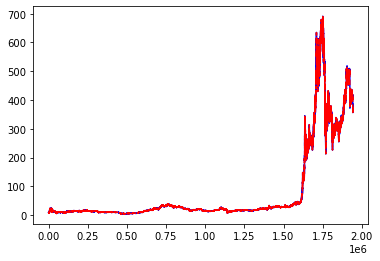

In [56]:
length = len(close_0)
plt.plot(range(length),close_0,'b')
plt.plot(range(length),close_0_denoise_res,'--r')
plt.tight_layout
plt.show()

In [43]:
print(len(close_0),len(close_0_denoise))

1942619 1942620


1942619

In [24]:
#coding=gbk
#使用小波分析进行阈值去噪声,使用pywt.threshold
 
import pywt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
 
data = np.linspace(1, 10, 10)
print(data)
# [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
# pywt.threshold(data, value, mode, substitute) mode 模式有4种，soft, hard, greater, less; substitute是替换值
 
data_soft = pywt.threshold(data=data, value=6, mode='soft', substitute=12)
print(data_soft)
# [12. 12. 12. 12. 12.  0.  1.  2.  3.  4.] 将小于6 的值设置为12， 大于等于6 的值全部减去6
 
data_hard = pywt.threshold(data=data, value=6, mode='hard', substitute=12)
print(data_hard)
# [12. 12. 12. 12. 12.  6.  7.  8.  9. 10.] 将小于6 的值设置为12， 其余的值不变
 
data_greater = pywt.threshold(data, 6, 'greater', 12)
print(data_greater)
# [12. 12. 12. 12. 12.  6.  7.  8.  9. 10.] 将小于6 的值设置为12，大于等于阈值的值不变化
 
data_less = pywt.threshold(data, 6, 'less', 12)
print(data_less)
# [ 1.  2.  3.  4.  5.  6. 12. 12. 12. 12.] 将大于6 的值设置为12， 小于等于阈值的值不变


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[12. 12. 12. 12. 12.  0.  1.  2.  3.  4.]
[12. 12. 12. 12. 12.  6.  7.  8.  9. 10.]
[12. 12. 12. 12. 12.  6.  7.  8.  9. 10.]
[ 1.  2.  3.  4.  5.  6. 12. 12. 12. 12.]


maximum level is 6


<Figure size 432x288 with 0 Axes>

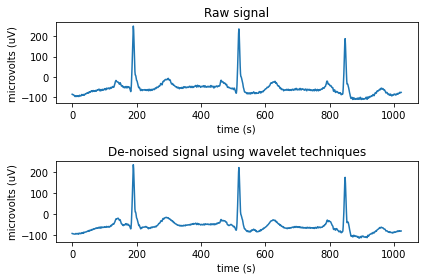